# **Simple Binary Classification Using ANN**

In [1]:
import pandas as pd
import tensorflow as tf

In [2]:
df = pd.read_csv('/content/ionosphere.csv', header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [3]:
X = df.drop(34, axis = 1)
y = df[34].values

In [4]:
X[:2], y

(   0   1        2        3        4        5        6        7    8        9   \
 0   1   0  0.99539 -0.05889  0.85243  0.02306  0.83398 -0.37708  1.0  0.03760   
 1   1   0  1.00000 -0.18829  0.93035 -0.36156 -0.10868 -0.93597  1.0 -0.04549   
 
    ...       24       25       26       27       28       29       30  \
 0  ...  0.56811 -0.51171  0.41078 -0.46168  0.21266 -0.34090  0.42267   
 1  ... -0.20332 -0.26569 -0.20468 -0.18401 -0.19040 -0.11593 -0.16626   
 
         31       32       33  
 0 -0.54487  0.18641 -0.45300  
 1 -0.06288 -0.13738 -0.02447  
 
 [2 rows x 34 columns],
 array(['g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g',
        'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b',
        'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g',
        'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b',
        'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g',
        'b', 'g', 'b', 'g', 'b', 'g', 'b'

In [5]:
from sklearn.preprocessing import LabelEncoder as LE
LE = LE()
y = LE.fit_transform(y)

In [6]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2)

In [7]:
X.shape[1]

34

Epoch 1/100
12/12 [==============================] - 1s 4ms/step - loss: 0.7256 - accuracy: 0.6321
Epoch 2/100
12/12 [==============================] - 0s 7ms/step - loss: 0.6666 - accuracy: 0.6393
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6219 - accuracy: 0.6571
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 0.5824 - accuracy: 0.6714
Epoch 5/100
12/12 [==============================] - 0s 6ms/step - loss: 0.5477 - accuracy: 0.6929
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 0.5177 - accuracy: 0.7321
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: 0.4894 - accuracy: 0.7714
Epoch 8/100
12/12 [==============================] - 0s 4ms/step - loss: 0.4649 - accuracy: 0.8036
Epoch 9/100
12/12 [==============================] - 0s 3ms/step - loss: 0.4409 - accuracy: 0.8214
Epoch 10/100
12/12 [==============================] - 0s 3ms/step - loss: 0.4191 - accuracy: 0.8393
Epoch 11/

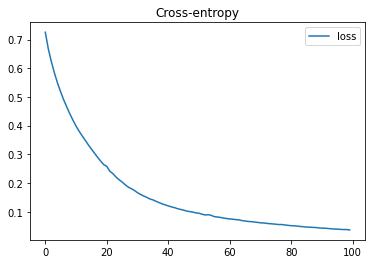

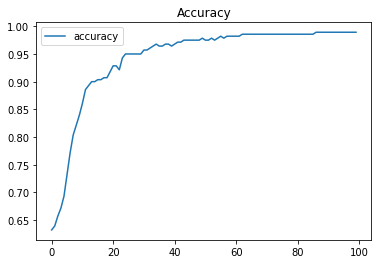

In [8]:
# 1. Define Model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(units=17, input_shape = (X.shape[1],), activation='relu', kernel_initializer = 'he_normal'))
model.add(Dense(units = 10, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dense(units = 1, activation = 'sigmoid'))

# 2. Compile Model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# 3. Fit Model
history = model.fit(X_train, y_train, epochs = 100, batch_size = 25, verbose = 1)

# 4. Evaluate Model
loss, acc = model.evaluate(X_test, y_test)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss']].plot(title="Cross-entropy")
history_df.loc[:, ['accuracy']].plot(title="Accuracy")

print('Accuracy of model is : %.3f' %acc)

In [9]:
print('Accuracy of model is : {:.2f} %'.format(acc*100))

Accuracy of model is : 91.55 %
